<a href="https://www.kaggle.com/code/mahtaba/titanic-simple-rf-model?scriptVersionId=93952842" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Advanced EDA

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

### Detecting Missing Values

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Detected missing data in Cabin, Age, and Embarked
round(train_data.isnull().sum().sort_values(ascending=False)/len(train_data)*100,2)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

Cabin col. is more or less useless. We'll estimate the missing values in Age and Embarked col. later.

### Pclass, Sex, Age

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data['Survived'].groupby(train_data.Pclass).agg(['count','mean'])

,count,mean
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


In [7]:
train_data['Survived'].groupby(train_data.Sex).agg(['count', 'mean'])

,count,mean
Sex,,
female,314,0.742038
male,577,0.188908


In [8]:
train_data[['Survived','Pclass','Sex']].groupby(['Pclass','Sex']).agg(['count','mean'])

Survived          
                 count      mean
Pclass Sex                      
1      female       94  0.968085
       male        122  0.368852
2      female       76  0.921053
       male        108  0.157407
3      female      144  0.500000
       male        347  0.135447

Pclass 1 and 2 females almost always survived while there is a 50-50 survival rate for a Pclass 3 female passengers. The survival rate for Pclass 1 male is a decent 36.9% while all other men were doomed to die.

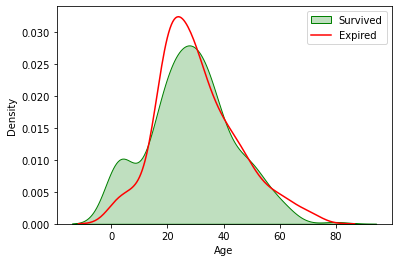

In [9]:
plt.figure()
sns.kdeplot(train_data['Age'][train_data.Survived==1], color='green', shade=True)
sns.kdeplot(train_data['Age'][train_data.Survived==0], color='red')
plt.legend(['Survived','Expired'])
plt.show()

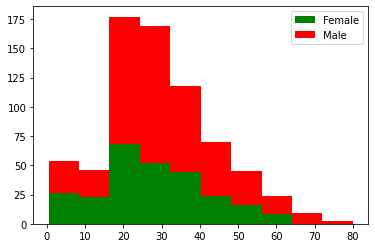

In [10]:
#Children seem to have a better chance surviving the Titanic,
#and there is a spike in expiry at around 18-35 years.
#Does the pattern repeat across gender?

#Checking for age distribution across gender
plt.figure()
plt.hist([train_data['Age'][train_data.Sex=='female'], train_data['Age'][train_data.Sex=='male']],
        stacked=True, color=['g','r'], label=['Female','Male'])
plt.legend()

<AxesSubplot:xlabel='Sex', ylabel='Age'>

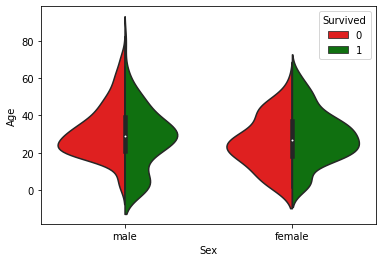

In [11]:
#There is a similar age distribution across gender
#So, let's check if patterns of survival repeats across gender.
sns.violinplot(x='Sex', y='Age', hue='Survived', split=True, data=train_data, palette={0:'r',1:'g'})

Expiry peaks at around 20 years for male passengers, while there is a decent chance of survival for female passengers across all ages. Male children had better chance of surviving the Titanic compared to female children. *Why?*

In [12]:
#Can we classify passengers based on their age and check their survival rate?
print('Survival rate of female above 49:', round(train_data['Survived'][train_data.Sex=='female'][train_data.Age>49].mean(), 2))
print('Survival rate of male above 49:', round(train_data['Survived'][train_data.Sex=='male'][train_data.Age>49].mean(), 2))
print('Survival rate of female below 16:', round(train_data['Survived'][train_data.Sex=='female'][train_data.Age<16].mean(), 2))
print('Survival rate of male below 16:', round(train_data['Survived'][train_data.Sex=='male'][train_data.Age<16].mean(), 2))
print('Survival rate of female between 20-32:', round(train_data['Survived'][train_data.Sex=='female'][train_data.Age>19][train_data.Age<32].mean(), 2))
print('Survival rate of male between 20-32:', round(train_data['Survived'][train_data.Sex=='male'][train_data.Age>19][train_data.Age<32].mean(), 2))

Survival rate of female above 49: 0.91
Survival rate of male above 49: 0.13
Survival rate of female below 16: 0.65
Survival rate of male below 16: 0.52
Survival rate of female between 20-32: 0.73
Survival rate of male between 20-32: 0.17


In [13]:
#Interesting, chances of survival improves with increase in age for women while it decreases drastically among men.
#Why did female children had such poor survival rate? We'll investigate this later.
train_data[(train_data.Age<16) & (train_data.Sex=='female')].groupby(train_data.Pclass).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,,
1,3,3,3,3,3,3,3,3,3,3,3,3
2,10,10,10,10,10,10,10,10,10,10,1,10
3,30,30,30,30,30,30,30,30,30,30,2,30


In [14]:
#So, more girls onboarded Titanic in Pclass 3, who anyway had a poor chance of surviving the Titanic to begin with.
#An interesting finding noted by Alhomora is that men were better off in Pclass 3 than Pclass 2.
round(train_data['Survived'][train_data.Sex=='male'][train_data.Age>19][train_data.Age<50].groupby(train_data.Pclass).mean(), 2)

Pclass
1    0.46
2    0.06
3    0.14
Name: Survived, dtype: float64

Findings
- Adult men had poor chance of survival.
- Females of Pclass 1 and 2 almost always survived while that of Pclass 3 had a 50% survival rate.
- Nearly all elderly women survived.
- Children, both boys and girls, had a decent chance of survival.
- Correlation is not causation: Female children had comparatively poor survival rate than adult females, however, upon probing further, it was found that more female children onboarded as Pclass 3 passengers and had poor survival rate to begin with.
- A case of Altruism: Men had DOUBLE the chance of surviving the unsinkable Titanic in Pclass 3 than Pclass 2.

### Fare

<AxesSubplot:xlabel='Fare', ylabel='Density'>

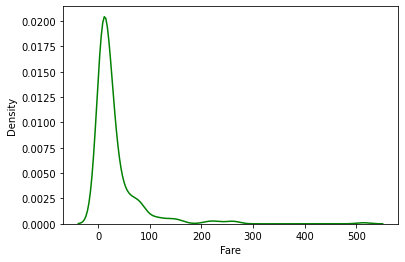

In [15]:
#Allohvk had pointed out that there were some rows where Fare==0,
#this is also clear from the following graph.
plt.figure()
sns.kdeplot(train_data['Fare'], color='green')

In [16]:
#Why is Fare==0 for some passengers?
train_data[(train_data.Fare==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


4 passengers with ZERO fare with 'LINE' tag are most likely Titanic crew. The rest are likely passengers. We'll have to treat Fare==0 as missing data and replace it with an estimated value, else it could mess up with the model later.

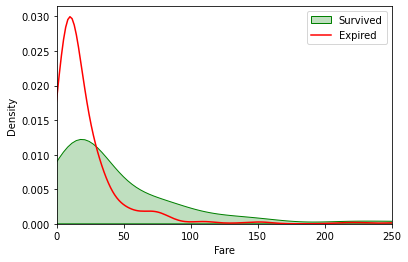

In [17]:
#We know Pclass 1 and 2 passengers had better survival chance than Pclass 3 passengers.
#Could fare data give us any additional insight?
plt.figure()
sns.kdeplot(train_data['Fare'][train_data.Survived==1], color='green', shade=True)
sns.kdeplot(train_data['Fare'][train_data.Survived==0], color='red')
plt.legend(['Survived', 'Expired'])

#There is a heavy tail, limit the X-axis to zoom into only the relevant info.
plt.xlim(0,250)
plt.show()

In [18]:
train_data['Fare'][train_data.Fare>0].groupby(train_data.Pclass).describe() #excluding missing values (Fare==0)

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,211.0,86.148874,78.212155,5.0000,32.9104,61.9792,99.9625,512.3292
2,178.0,21.358661,13.083169,10.5000,13.0000,15.0229,26.0000,73.5000
3,487.0,13.787875,11.760718,4.0125,7.7500,8.0500,15.5000,69.5500


There is a huge spike in expiry at Fare = 10-20. Post that, survival rate improves significantly. The point where the green line touches the red line is where I suspect Pclass changes from 3 to 2, as the fare for Pclass 2 too mostly ranges between 13-26 (Q1-Q3).

In [19]:
#Allohvk had found that passengers who travelled on Fare<7.1 had a dismal survival rate.
print(len(train_data[(train_data.Fare<7.1) & (train_data.Fare>0)]))

23


In [20]:
#So, 23 folks travelled on Titanic for $7 or less, did they make it through though?
round(train_data['Survived'][(train_data.Fare<7.1) & (train_data.Fare>0)].mean()*100,2)

4.35

In [21]:
train_data[(train_data.Fare<7.1) & (train_data.Fare>0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q


These 23 folks had a dismal chance of surving the Titanic (4%). Even if all of them travelled on Pclass 3 and were men, they should have had a survival rate of min. 13.5%. A lot of them are single men who could have gotten small bunkers that were furthest from lifeboats for a discount. This %age is statistically significant and we can add a separate feature classifying these as High Risk.

In [22]:
#How many folks traveled on Fare less than $9?
len(train_data[(train_data.Fare<9) & (train_data.Fare>0)])

296

In [23]:
#How many of these 296 folks were either children, elderly or women?
train_data[(train_data.Fare<9) & (train_data.Fare>0) & (train_data.Age<14)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
780,781,1,3,"Ayoub, Miss. Banoura",female,13.00,0,0,2687,7.2292,NaN,C
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [24]:
#Only 2 children. How many old ones?
train_data[(train_data.Fare<9) & (train_data.Fare>0) & (train_data.Age>49)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [25]:
#10 old folks. This is statistically significant and we can use this information to more accurately estimate missing ages.
len(train_data[(train_data.Fare<9) & (train_data.Fare>0) & (train_data.Age.isnull())])

91

In [26]:
len(train_data[(train_data.Fare<9) & (train_data.Fare>0)])

296

In [27]:
train_data['Survived'][(train_data.Fare<9)].mean()

0.19935691318327975

In [28]:
train_data['Survived'][(train_data.Fare<9)].groupby(train_data.Sex).count()

Sex
female     56
male      255
Name: Survived, dtype: int64

Findings
- Higher the fare, better the survival rate (better captured by Pclass).
- There are few rows with Fare==0, we'll have to replace them with estimated Fare so it doesn't mess with our ML model later.
- Only 1 out of 23 folks who traveled for Fare=7 or less survived. We can use this data and classify such groups as 'High Risk'.
- Quite a lot of single men got a bunker on Titanic at a discount (Fare<9) and a lot of them (91 out of 296) did not have age details. We can use the fact that they were mostly men (255 out of 311) and adults to more accurately estimate missing age data.

### Solo v. Group travelers

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

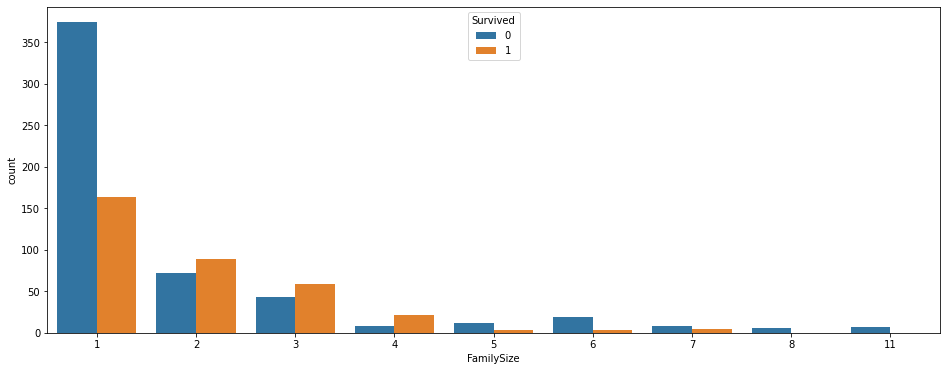

In [29]:
#Allohvk had found that solo travelers had less survival rate
train_data['FamilySize'] = train_data.SibSp + train_data.Parch + 1 #including the person
plt.figure(figsize=(16,6))
sns.countplot(x='FamilySize', hue='Survived', data=train_data)

In [30]:
#Solo travelers have comparatively poor survival rate.
#However, it seems that beyond FamilySize=4, survival rate drops again.
#Is it a case of correlation or causation?
print('Class 1-2 passengers of family size 2-4:', len(train_data[(train_data.FamilySize.between(2,4, inclusive='both')) & (train_data.Pclass.between(1,2, inclusive='both'))]))
print('Class 3 passengers of family size 2-4:', len(train_data[(train_data.FamilySize.between(2,4, inclusive='both')) & (train_data.Pclass==3)]))
print('Class 1-2 passengers of family size >4', len(train_data[(train_data.FamilySize>4) & (train_data.Pclass.between(1,2, inclusive='both'))]))
print('Class 3 passengers of family size >4:', len(train_data[(train_data.FamilySize>4) & (train_data.Pclass==3)]))

Class 1-2 passengers of family size 2-4: 179
Class 3 passengers of family size 2-4: 113
Class 1-2 passengers of family size >4 8
Class 3 passengers of family size >4: 54


There were 54 (out of 62) large groups in Pclass 3, who anyway had poor survival chance. Compared to this, smaller groups had a more uniformed distribution. Even this solos were doomed to die trend needs to be investigated.

In [31]:
print('Survival rate of solo female travelers:', train_data['Survived'][(train_data.Sex=='female') & (train_data.FamilySize==1)].mean())
print('Survival rate of non-solo female travelers:', train_data['Survived'][(train_data.Sex=='female') & (train_data.FamilySize>1)].mean())

Survival rate of solo female travelers: 0.7857142857142857
Survival rate of non-solo female travelers: 0.7127659574468085


So, female solo travelers buck the trend. Upon probing further, Allohvk found that female travelers who traveled with their family in Pclass 3 had poor survival rate compared to solo female travelers in Pclass 3. Allohvk hypothesized that these women likely chose to die with their family than to leave their family behind on the sinking Titanic.

In [32]:
print('Survival rate of non-solo female travelers of Pclass 3:', train_data['Survived'][(train_data.Sex=='female') & (train_data.Pclass==3) & (train_data.FamilySize>1)].mean())
print('Survival rate of solo female travelers of Pclass 3:', train_data['Survived'][(train_data.Sex=='female') & (train_data.Pclass==3) & (train_data.FamilySize==1)].mean())

Survival rate of non-solo female travelers of Pclass 3: 0.4166666666666667
Survival rate of solo female travelers of Pclass 3: 0.6166666666666667


Men stood a greater chance of survival if they traveled in group. Women buck this trend. Upon probing further, it was found that women who traveled with their family in Pclass==3 likely chose to die with their family who could not leave the sinking ship.

# Missing Value Amputation

In [33]:
combined = train_data.append(test_data)
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [34]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  FamilySize   891 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 143.2+ KB


### Fare

In [35]:
combined[combined.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN


In [36]:
#Fares shown are that for the whole group, so we'll calculate FarePerPerson for better estimation
#Usually it's a bad idea to base our estimations using test_data, however, it's safe in this case
for df in [train_data, test_data, combined]:
    df['PeopleInTicket'] = df['Ticket'].map(combined['Ticket'].value_counts())
    df['FarePerPerson'] = df['Fare']/df['PeopleInTicket']

In [37]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,PeopleInTicket,FarePerPerson
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,1,7.25000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,2,35.64165
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,1,7.92500
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,2,26.55000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,1,8.05000


In [38]:
#PassengerId 1044 (with missing fare) embarked at port S and traveled in Third class. Did he travel alone or in group?
test_data[test_data.PassengerId==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1,NaN


In [39]:
#So passenger 1044 traveled alone or at least purchase his ticket separetely
#The average Fare/person for passengers who boarded at port S is 7.38, but, as
#Allohvk explains, it could be influenced by group discounts
#So we compute Fare for passengers who onboarded at port S and traveled alone

print('Mean fare/person at port S:', train_data[(train_data.Embarked=='S') & (train_data.Pclass==3)]['FarePerPerson'].mean())
print('Mean fare for sole travelers at port S:', train_data[(train_data.Embarked=='S') & (train_data.Pclass==3) & (train_data.PeopleInTicket==1)]['Fare'].mean())

Mean fare/person at port S: 7.382647773383368
Mean fare for sole travelers at port S: 8.107133478260868


In [40]:
##See the difference! We'll impute the missing fare with 8.11
test_data.loc[test_data.Fare.isnull(), ['Fare', 'FarePerPerson']] = 8.11
test_data[test_data.PassengerId==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.11,NaN,S,1,8.11


### Embarked

In [41]:
combined[combined.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,PeopleInTicket,FarePerPerson
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1.0,2,40.0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1.0,2,40.0


In [42]:
#FarePerPerson for both passengers is 40 and Pclass is 1. Since fare is likely to be influenced by distance and therefore by port (Embarked), let's see the average fare per person at diff ports
train_data[(train_data.Pclass==1)].groupby('Embarked').agg({'FarePerPerson':'mean', 'Fare':'mean', 'PassengerId':'count'})

,FarePerPerson,Fare,PassengerId
Embarked,,,
C,39.179223,104.718529,85
Q,30.000000,90.000000,2
S,30.211849,70.364862,127


In [43]:
#So it seems the two passengers likely boarded at port C. But the two passengers could have received group discount and adults might have been charged a little more
train_data[(train_data.Pclass==1) & (train_data.PeopleInTicket==2) & (train_data.Age>18)].groupby('Embarked').agg({'FarePerPerson':'mean', 'Fare':'mean', 'PassengerId':'count'})

,FarePerPerson,Fare,PassengerId
Embarked,,,
C,35.073648,70.147296,23
S,31.702411,63.404822,32


In [44]:
#The gap has narrowed but our guess remains the same
train_data.loc[train_data.Embarked.isnull(), 'Embarked']='C'

In [45]:
train_data[(train_data.PassengerId==62)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,PeopleInTicket,FarePerPerson
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C,1,2,40.0


In [46]:
train_data[(train_data.PassengerId==830)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,PeopleInTicket,FarePerPerson
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C,1,2,40.0


### Age

The simplest way to deal with missing age is to replace the Nan values with the mean or median age, both of which is around ~30 years. However, one would be more accurate in imputing Nan ages by calculating mean age of a group of *similar passengers*. For example, one could choose to calculate mean of Pclass 1 passengers and assign it to all Pclass 1 missing ages, and likeways for Pclass 2 and Pclass 3. But we can further improvise on this. It quite likely that females on Pclass 3 have a different mean age than females on Pclass 1. So, an even better approach is to group people based on Sex+Pclass.

Yet, it is impossible to tell between a child and an adult based solely on Sex+Pclass and since we have seen that children have a much better chance of surviving than adults, it'd improve our predictions if we could identify children. Fortunately, for male children, their Title contains the 'Master' prefix which we can use to identify male children. We identify 8 male children with missing ages all of which traveled in Pclass 3 and the mean age of male children of Pclass 3 is 5.35. So, 5 is a good average Age for these 8 boys.

Before we update the values for these 8 kids, let us do a quick sanity check. We know that these kids should ideally have non-zero Parch i.e. these small kids should not be travelling alone but travelling with at least 1 parent!

In [47]:
combined[(combined.Age.isnull()) & (combined.Name.str.contains('Master'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,PeopleInTicket,FarePerPerson
65,66,1.0,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,3.0,3,5.081933
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,11.0,11,6.322727
176,177,0.0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,5.0,5,5.093340
709,710,1.0,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,3.0,3,5.081933
244,1136,NaN,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,4,5.862500
339,1231,NaN,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C,NaN,1,7.229200
344,1236,NaN,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,NaN,3,4.833333
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,NaN,3,7.452767


In [48]:
train_data['Age'][(train_data.Name.str.contains('Master')) & (train_data.Pclass==3)].mean()

5.350833333333334

In [49]:
#So there is 1 case where a child (with missing age) is traveling without a parent or sibling. Who is this boy traveling with?
combined[(combined.Ticket=='2622')] #all passengers on same ticket as the boy with missing age and without parents/siblings

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,PeopleInTicket,FarePerPerson
339,1231,NaN,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C,NaN,1,7.2292


In [50]:
#So the boy is likely traveling alone. We will assume that the boy is a little senior in age and cannot be 5. We will assign the max value of Master i.e. 14.
test_data.loc[test_data.PassengerId==1231, 'Age']=14

In [51]:
test_data[(test_data.Ticket=='2622')] #the code worked

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson
339,1231,3,"Betros, Master. Seman",male,14.0,0,0,2622,7.2292,NaN,C,1,7.2292


The remaining ages will be filled up as a part of the common code. For that we need to extract the 'Title' from the name as below.

Note (for me): Regular expressions use the backslash character ('\') to indicate special forms or to allow special characters to be used without invoking their special meaning.

In [52]:
train_data['Title'], test_data['Title'] = [df.Name.str.extract(' ([A-Za-z]+)\.', expand=False) for df in [train_data, test_data]]

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,PeopleInTicket,FarePerPerson,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,7.25000,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,35.64165,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,7.92500,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,26.55000,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,8.05000,Mr


In [54]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,7.82920,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,7.00000,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,9.68750,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,8.66250,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,6.14375,Mrs


In [55]:
train_data[['Age','Title','Pclass']].groupby(['Title','Pclass']).agg(['count','mean'])

Age           
                count       mean
Title    Pclass                 
Capt     1          1  70.000000
Col      1          2  58.000000
Countess 1          1  33.000000
Don      1          1  40.000000
Dr       1          4  43.750000
         2          2  38.500000
Jonkheer 1          1  38.000000
Lady     1          1  48.000000
Major    1          2  48.500000
Master   1          3   5.306667
         2          9   2.258889
         3         24   5.350833
Miss     1         45  30.000000
         2         32  22.390625
         3         69  16.123188
Mlle     1          2  24.000000
Mme      1          1  24.000000
Mr       1         87  41.580460
         2         82  32.768293
         3        229  28.724891
Mrs      1         34  40.882353
         2         41  33.682927
         3         33  33.515152
Ms       2          1  28.000000
Rev      2          6  43.166667
Sir      1          1  49.000000

In [56]:
#A shorter version of the above code is as follows
train_data.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

#By the way, we will replace missing age based on age data of train_data only to prevent leakage from test to train data.

mean  count
Title    Pclass                  
Capt     1       70.000000      1
Col      1       58.000000      2
Countess 1       33.000000      1
Don      1       40.000000      1
Dr       1       43.750000      4
         2       38.500000      2
Jonkheer 1       38.000000      1
Lady     1       48.000000      1
Major    1       48.500000      2
Master   1        5.306667      3
         2        2.258889      9
         3        5.350833     24
Miss     1       30.000000     45
         2       22.390625     32
         3       16.123188     69
Mlle     1       24.000000      2
Mme      1       24.000000      1
Mr       1       41.580460     87
         2       32.768293     82
         3       28.724891    229
Mrs      1       40.882353     34
         2       33.682927     41
         3       33.515152     33
Ms       2       28.000000      1
Rev      2       43.166667      6
Sir      1       49.000000      1

In [57]:
#There are too many titles, which isn't needed for our case, let's consolidate them into a few important ones
#To do that, we will create a Python dict to map the titles
TitleDict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty", \
             "Don": "Royalty", "Sir" : "Royalty","Dr": "Royalty","Rev": "Royalty", \
             "Countess":"Royalty", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs","Mr" : "Mr", \
             "Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [58]:
train_data['Title'], test_data['Title'] = [df.Title.map(TitleDict) for df in [train_data, test_data]]
train_data.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title   Pclass                  
Master  1        5.306667      3
        2        2.258889      9
        3        5.350833     24
Miss    1       29.744681     47
        2       22.390625     32
        3       16.123188     69
Mr      1       41.580460     87
        2       32.768293     82
        3       28.724891    229
Mrs     1       40.400000     35
        2       33.547619     42
        3       33.515152     33
Officer 1       56.600000      5
Royalty 1       42.555556      9
        2       42.000000      8

In [59]:
test_data[test_data.Title.isnull()] #There is a new title in the test data 'Dona', we'll replace it with 'Royalty'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,3,36.3,NaN


In [60]:
test_data.at[414, 'Title'] = 'Royalty' #we call the row 'at' index=414 and impute the Title

In [61]:
test_data[test_data.Title.isnull()] #Yippee

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson,Title


Now all title are in shape. We can groupby Pclass, Sex, Title and find the mean and then plug in all the missing Age values. But we are yet to identify female children. Naturally, all female children carry the Title 'Miss' and should ideally be accompanied with a parent i.e. Parch>0. On the other hand, unmarried adult women ('Miss') don't have children and are less likely to be accompanied by a parent (we can't know for sure though). So, if Parch flag is >0 then they are most likely female children.

In [62]:
print("Avg age of 'Miss' Title:", round(train_data[train_data.Title=='Miss']['Age'].mean()))
print("Avg age of 'Miss' Title traveling without Parents:", round(train_data[(train_data.Title=='Miss') & (train_data.Parch==0)]['Age'].mean()))
print("Avg age of 'Miss' Title traveling with Parent/s:", round(train_data[(train_data.Title=='Miss') & (train_data.Parch!=0)]['Age'].mean()))

Avg age of 'Miss' Title: 22
Avg age of 'Miss' Title traveling without Parents: 28
Avg age of 'Miss' Title traveling with Parent/s: 12


In [63]:
train_data[(train_data.Title=='Miss') & (train_data.Parch!=0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,PeopleInTicket,FarePerPerson,Title
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,3,3,5.566667,Miss
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,5,5,4.215000,Miss
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,4,4,10.394800,Miss
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S,4,4,6.937500,Miss
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,7,1,7.925000,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,3,3,27.719433,Miss
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,3,3,5.081933,Miss
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,2,2,19.700000,Miss
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11,11,6.322727,Miss


In [64]:
for df in [train_data, test_data]:
    df.loc[(df.Title=='Miss') & (df.Parch!=0) & (df.PeopleInTicket>1), 'Title']="FemaleChild" #We can't expect for a child to travel without their parent/s

In [65]:
train_data[(train_data.Age.isnull()) & (train_data.Title=='FemaleChild')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,PeopleInTicket,FarePerPerson,Title
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,3,3,7.452767,FemaleChild
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11,11,6.322727,FemaleChild
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,5,5,5.093340,FemaleChild
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S,5,5,5.093340,FemaleChild
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,5,5,5.093340,FemaleChild
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11,11,6.322727,FemaleChild
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11,11,6.322727,FemaleChild
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,4,5.862500,FemaleChild


In [66]:
test_data[(test_data.Age.isnull()) & (test_data.Title=='FemaleChild')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson,Title
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727,FemaleChild


In [67]:
#Define a group containing all the parameters you want, do a mean
#Convert this group into Pandas df, this will be our lookup table that we'll use to impute missing ages
#For more detail why I do this, refer: Allohvk's notebook
grp = train_data.groupby(['Pclass', 'Sex', 'Title'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
print(type(grp))
grp

<class 'pandas.core.frame.DataFrame'>


,Sex,Pclass,Title,Age
0,female,1,FemaleChild,21.071429
1,female,1,Miss,33.424242
2,female,1,Mrs,40.400000
3,female,1,Royalty,43.333333
4,male,1,Master,5.306667
5,male,1,Mr,41.580460
6,male,1,Officer,56.600000
7,male,1,Royalty,42.166667
8,female,2,FemaleChild,9.916667
9,female,2,Miss,29.875000


In [68]:
grp[(grp.Pclass==3) & (grp.Title=='FemaleChild')]['Age']

14    6.5
Name: Age, dtype: float64

In [69]:
#Our lookup table returns a series object instead of a number, so we'll use a little modified code to resolve this
grp[(grp.Pclass==3) & (grp.Title=='FemaleChild')]['Age'].values[0]

6.5

In [70]:
#Define the function fill_age. This will look up the combined passed to it using the above lookup table
#and return the value of the age associated

def fill_age(x):
    return grp[(grp.Pclass==x.Pclass) & (grp.Sex==x.Sex) & (grp.Title==x.Title)]['Age'].values[0]

#Here 'x' is the row containing the missing age. We look up the row's Pclass, Sex and title against
#the look up table and the function returns the mean age for that group
#Now we have to call this function for every missing row for test, train data

train_data['Age'], test_data['Age'] = [df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1) for df in [train_data, test_data]]

combined = train_data.append(test_data) #redefining combined
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Name            1309 non-null   object 
 4   Sex             1309 non-null   object 
 5   Age             1309 non-null   float64
 6   SibSp           1309 non-null   int64  
 7   Parch           1309 non-null   int64  
 8   Ticket          1309 non-null   object 
 9   Fare            1309 non-null   float64
 10  Cabin           295 non-null    object 
 11  Embarked        1309 non-null   object 
 12  FamilySize      891 non-null    float64
 13  PeopleInTicket  1309 non-null   int64  
 14  FarePerPerson   1309 non-null   float64
 15  Title           1309 non-null   object 
dtypes: float64(5), int64(5), object(6)
memory usage: 173.9+ KB


Yippee! We have imputed missing ages, fare, and embarked.

# Model Fit

Notes on features selection:
- I'll use Age, Sex, and Pclass as these are important predictors.
- I won't use Fare as a feature since that's better captured by Pclass, however, as we saw in the EDA, passengers who traveled on <7.1 were at high risk and it could help improve our model. So, I'll create another feature column 'High Risk'.
- Ticket could be an important predictors, my assumption is that if everyone else in the group survives, the person likely survives as well.
- Besides, I don't think Embarked and other columns can improve our model. They may as well create noise.

In [71]:
train_data.loc[(train_data.Fare < 7.1),  'HighRisk'] = 1
train_data.loc[(train_data.Fare >= 7.1), 'HighRisk'] = 0

In [72]:
test_data.loc[(test_data.Fare < 7.1),  'HighRisk'] = 1
test_data.loc[(test_data.Fare >= 7.1), 'HighRisk'] = 0

In [73]:
for df in [train_data, test_data]:
    df['Sex_boolean'] = df['Sex'].map({'male':1,'female':0})

In [74]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        891 non-null    object 
 12  FamilySize      891 non-null    int64  
 13  PeopleInTicket  891 non-null    int64  
 14  FarePerPerson   891 non-null    float64
 15  Title           891 non-null    object 
 16  HighRisk        891 non-null    float64
 17  Sex_boolean     891 non-null    int

In [75]:
features =['Age', 'Sex_boolean', 'Pclass', 'SibSp', 'Parch', 'HighRisk']
y = train_data['Survived']
X = train_data[features]

In [76]:
X.head()

,Age,Sex_boolean,Pclass,SibSp,Parch,HighRisk
0,22.0,1,3,1,0,0.0
1,38.0,0,1,1,0,0.0
2,26.0,0,3,0,0,0.0
3,35.0,0,1,1,0,0.0
4,35.0,1,3,0,0,0.0


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

In [78]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [79]:
y_predictions = model.predict(X_val)

In [80]:
y_predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1])

In [81]:
model.score(X_val, y_val)

0.7555555555555555

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_predictions)

0.7555555555555555

# Submitting Predictions

In [83]:
X_test = test_data[features]
test_data['Survived'] = model.predict(X_test)

test_data[['PassengerId','Survived']].to_csv('KaggleOutput', index=False)